In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import dill as pk

In [2]:
datetime.now(), datetime.now() - timedelta(days=7)

(datetime.datetime(2024, 6, 24, 15, 51, 9, 81706),
 datetime.datetime(2024, 6, 17, 15, 51, 9, 81710))

In [3]:
infy = yf.download('INFY.NS' ,start=datetime.now()-timedelta(days=30), end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [4]:
infy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-27,1471.849976,1479.599976,1460.250000,1471.349976,1463.104004,5821844
2024-05-28,1475.500000,1476.000000,1460.300049,1467.050049,1458.828125,6186922
2024-05-29,1465.400024,1465.500000,1450.000000,1450.949951,1442.818237,7401634
2024-05-30,1442.800049,1449.849976,1421.550049,1427.449951,1419.449951,9663150
2024-05-31,1409.800049,1436.750000,1400.000000,1406.900024,1406.900024,37113815
2024-06-03,1440.000000,1440.000000,1404.000000,1405.900024,1405.900024,10589244
2024-06-04,1409.000000,1415.000000,1358.349976,1393.650024,1393.650024,13736134
2024-06-05,1400.150024,1438.000000,1400.150024,1430.099976,1430.099976,9233424
2024-06-06,1444.949951,1474.300049,1437.500000,1472.250000,1472.250000,12660930


In [24]:
df = pd.DataFrame(infy)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-10,1525.300049,1529.800049,1497.300049,1499.750000,1499.750000,6810606
2024-06-11,1500.050049,1506.449951,1493.949951,1495.750000,1495.750000,4853054
2024-06-12,1507.000000,1508.750000,1482.750000,1485.199951,1485.199951,9564320
2024-06-13,1495.000000,1505.000000,1489.349976,1493.949951,1493.949951,7307565
2024-06-14,1503.699951,1503.699951,1486.050049,1488.900024,1488.900024,4237727
2024-06-18,1497.000000,1507.000000,1495.400024,1498.199951,1498.199951,5420939
2024-06-19,1505.000000,1515.650024,1496.699951,1511.349976,1511.349976,5493456
2024-06-20,1516.300049,1517.500000,1499.099976,1515.400024,1515.400024,7927010
2024-06-21,1545.000000,1557.750000,1523.699951,1532.699951,1532.699951,17301941


In [6]:
df.insert(0, 'Date', df.index, True)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2024-05-27 to 2024-06-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20 non-null     datetime64[ns]
 1   Open       20 non-null     float64       
 2   High       20 non-null     float64       
 3   Low        20 non-null     float64       
 4   Close      20 non-null     float64       
 5   Adj Close  20 non-null     float64       
 6   Volume     20 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


<Axes: xlabel='Date', ylabel='Close'>

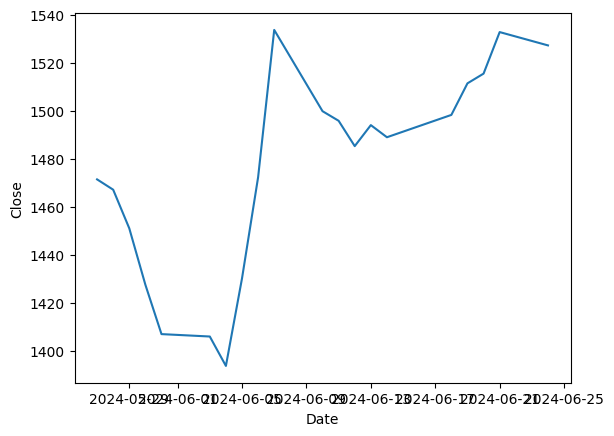

In [7]:
sns.lineplot(x='Date', y='Close', data=df)

In [8]:
df = df[['Date', 'Close']]

In [9]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 6
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df.head()

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6)
Date,,,,,,,
2024-06-04,1393.650024,1405.900024,1406.900024,1427.449951,1450.949951,1467.050049,1471.349976
2024-06-05,1430.099976,1393.650024,1405.900024,1406.900024,1427.449951,1450.949951,1467.050049
2024-06-06,1472.250000,1430.099976,1393.650024,1405.900024,1406.900024,1427.449951,1450.949951
2024-06-07,1533.599976,1472.250000,1430.099976,1393.650024,1405.900024,1406.900024,1427.449951
2024-06-10,1499.750000,1533.599976,1472.250000,1430.099976,1393.650024,1405.900024,1406.900024


In [10]:
shifted_df = shifted_df.tail(1)

In [11]:
shifted_df_to_np = shifted_df.to_numpy()
shifted_df_to_np

array([[1527.15002441, 1532.69995117, 1515.40002441, 1511.34997559,
        1498.19995117, 1488.90002441, 1493.94995117]])

In [12]:
shifted_df_to_np = np.flip(shifted_df_to_np, axis=1)
shifted_df_to_np

array([[1493.94995117, 1488.90002441, 1498.19995117, 1511.34997559,
        1515.40002441, 1532.69995117, 1527.15002441]])

In [13]:
np_final = shifted_df_to_np.reshape((-1, 7, 1))
np_final.shape

(1, 7, 1)

In [14]:
tens = torch.tensor(np_final.copy()).to(dtype=torch.float)
tens.shape

torch.Size([1, 7, 1])

In [15]:
with open('Models/INFY.NS.pt', 'rb') as file:
    model = pk.load(file)

model.eval()

LSTM_Stock(
  (LSTM): LSTM(1, 10, num_layers=3, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [16]:
device = 'cuda:0'

In [17]:
predict = model(tens.to(device)).detach().to('cpu').numpy().flatten()

In [18]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(shifted_df_to_np)

MinMaxScaler(feature_range=(-1, 1))

In [19]:
predict = predict.reshape((-1, 1))
predict

array([[0.9148524]], dtype=float32)

In [20]:
dummy = np.zeros(shape=(1, 7))

In [21]:
dummy[0, 0] = predict
dummy

array([[0.91485238, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [22]:
predict = scaler.inverse_transform(dummy)
predict[0, 0]

1494.9073773622513